In [49]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import scipy as sp

from matplotlib import pyplot as plt
from scipy.stats import dirichlet

In [2]:
N = 20
K = 1000

alpha = 200.
P0 = sp.stats.norm

In [3]:
beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

x_plot = np.linspace(-3, 3, 200)

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

In [4]:
sample_cdfs

array([[8.04581162e-04, 8.04581162e-04, 8.04581162e-04, ...,
        9.93146519e-01, 9.93146519e-01, 9.93146519e-01],
       [4.43323478e-03, 4.43323478e-03, 4.43323478e-03, ...,
        9.93216242e-01, 9.93216242e-01, 9.93216242e-01],
       [6.93916326e-03, 6.93916326e-03, 6.93916326e-03, ...,
        9.92259425e-01, 9.93433956e-01, 9.93433956e-01],
       ...,
       [4.40559017e-04, 1.16836381e-03, 1.16836381e-03, ...,
        9.94258704e-01, 9.94441176e-01, 9.94441176e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.91761654e-01, 9.91761654e-01, 9.91761654e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.95103639e-01, 9.95103639e-01, 9.95103639e-01]])

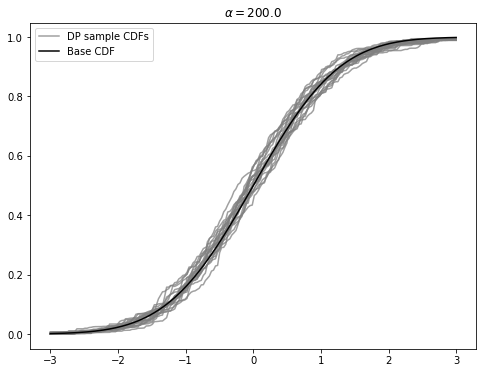

In [5]:
fig, l_ax = plt.subplots(figsize=(8, 6))

# ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
#         label='DP sample CDFs');
# ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
# ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

# ax.set_title(r'$\alpha = {}$'.format(alpha));
# ax.legend(loc=2);

l_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
l_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
l_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

l_ax.set_title(r'$\alpha = {}$'.format(alpha));
l_ax.legend(loc=2);


In [6]:
sample_cdfs[1:]

array([[4.43323478e-03, 4.43323478e-03, 4.43323478e-03, ...,
        9.93216242e-01, 9.93216242e-01, 9.93216242e-01],
       [6.93916326e-03, 6.93916326e-03, 6.93916326e-03, ...,
        9.92259425e-01, 9.93433956e-01, 9.93433956e-01],
       [9.31916475e-04, 9.31916475e-04, 9.31916475e-04, ...,
        9.93175110e-01, 9.93175110e-01, 9.93175110e-01],
       ...,
       [4.40559017e-04, 1.16836381e-03, 1.16836381e-03, ...,
        9.94258704e-01, 9.94441176e-01, 9.94441176e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.91761654e-01, 9.91761654e-01, 9.91761654e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.95103639e-01, 9.95103639e-01, 9.95103639e-01]])

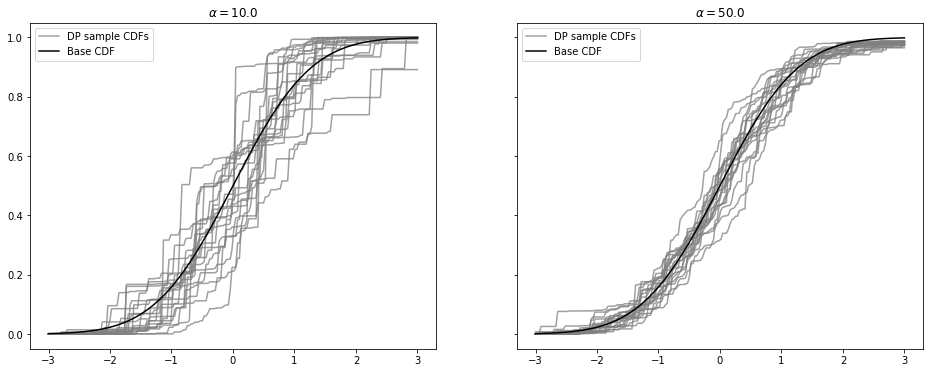

In [7]:
fig, (l_ax, r_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

K = 200
alpha = 10.

beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

l_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
l_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
l_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

l_ax.set_title(r'$\alpha = {}$'.format(alpha));
l_ax.legend(loc=2);

K = 200
alpha = 50.

beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

r_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
r_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
r_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

r_ax.set_title(r'$\alpha = {}$'.format(alpha));
r_ax.legend(loc=2);

In [78]:
def CRP(N, alpha):
    table = [1] # First person sits at first table with probability 1
    for i in range(1, N):
        unique_tables, counts = np.unique(table, return_counts=True)
        probs = np.array(counts / (i + alpha))
        probs = np.append(probs, alpha / (i + alpha))
        table.append((np.random.choice(range(len(probs)) , p=probs)+ 1))
    return table

In [82]:
dirichlet_large_k(10, 2000, 500)
-np.sort(-dirichlet(([alpha/K]*K)).rvs())

[[0.18037741 0.08849636 0.08217697 ... 0.         0.         0.        ]]


ValueError: object too deep for desired array

In [66]:
y = CRP(500,10)

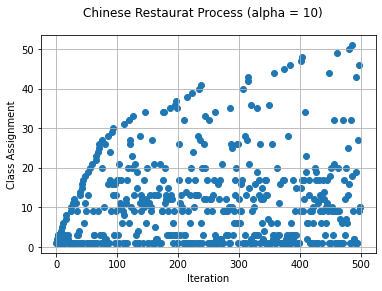

In [83]:
fig, ax = plt.subplots()
ax.scatter(range(len(y)), y)
fig.suptitle("Chinese Restaurat Process (alpha = 10)")
ax.grid()
plt.xlabel("Iteration")
plt.ylabel("Class Assignment")
fig.show()

